In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [2]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [5]:
X.isnull().values.any()


False

In [6]:
y.isnull().values.any()


False

In [7]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [28]:
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=23,stratify=y)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,          #num of trees
    learning_rate=0.1,    
    depth=6,                 #tree depth
    loss_function="Logloss", #binary classif
    eval_metric="Accuracy",
    verbose=100,         
    random_seed=42
)


model.fit(x_train, y_train, eval_set=(x_test, y_test))


0:	learn: 0.8640413	test: 0.8642778	best: 0.8642778 (0)	total: 70ms	remaining: 34.9s
100:	learn: 0.8684563	test: 0.8673132	best: 0.8678059 (69)	total: 1.08s	remaining: 4.26s
200:	learn: 0.8705948	test: 0.8670569	best: 0.8678059 (69)	total: 2.62s	remaining: 3.89s
300:	learn: 0.8721076	test: 0.8667810	best: 0.8678059 (69)	total: 4.13s	remaining: 2.73s
400:	learn: 0.8736252	test: 0.8668795	best: 0.8678059 (69)	total: 5.64s	remaining: 1.39s
499:	learn: 0.8748867	test: 0.8665642	best: 0.8678059 (69)	total: 7.14s	remaining: 0us

bestTest = 0.8678058972
bestIteration = 69

Shrink model to first 70 iterations.


In [13]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8678058971933144

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.60      0.15      0.24      7069

    accuracy                           0.87     50736
   macro avg       0.74      0.57      0.58     50736
weighted avg       0.84      0.87      0.83     50736



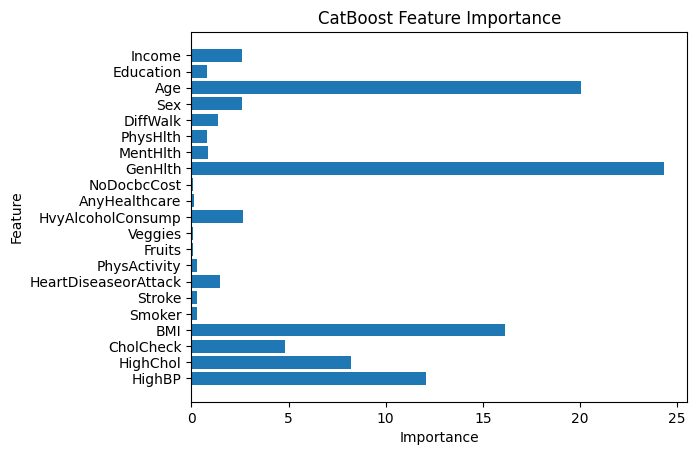

In [14]:
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance()
plt.barh(X.columns, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("CatBoost Feature Importance")
plt.show()


In [16]:
# Select only top important features
top_features = ["GenHlth", "Age", "BMI", "HighBP", "HighChol", "PhysHlth", "Sex"]

X = X[top_features]
y = y["Diabetes_binary"]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train CatBoost with selected features
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    eval_metric="Accuracy",
    verbose=100,
    random_seed=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)

print("Accuracy with Top Features:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


0:	learn: 0.8643320	test: 0.8637654	best: 0.8637654 (0)	total: 19.8ms	remaining: 9.86s
100:	learn: 0.8673033	test: 0.8643764	best: 0.8651451 (43)	total: 1.52s	remaining: 6s
200:	learn: 0.8679586	test: 0.8646720	best: 0.8651451 (43)	total: 2.93s	remaining: 4.35s
300:	learn: 0.8685598	test: 0.8645735	best: 0.8651451 (43)	total: 4.36s	remaining: 2.88s
400:	learn: 0.8692595	test: 0.8641202	best: 0.8651451 (43)	total: 5.78s	remaining: 1.43s
499:	learn: 0.8695305	test: 0.8640807	best: 0.8651451 (43)	total: 7.16s	remaining: 0us

bestTest = 0.8651450646
bestIteration = 43

Shrink model to first 44 iterations.
Accuracy with Top Features: 0.8651450646483759

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.93     43667
           1       0.57      0.13      0.21      7069

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.83      0.87      0.83    

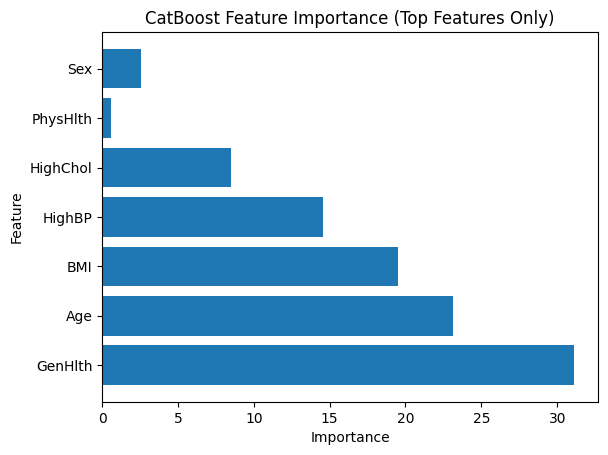

In [19]:
#rechecking feature importance
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance()
plt.barh(top_features, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("CatBoost Feature Importance (Top Features Only)")
plt.show()


In [24]:
# Select only top important features
top_features = ["GenHlth", "Age", "BMI", "HighBP", "HighChol"]

X = X[top_features]
y = y


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [26]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train CatBoost with selected features
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    eval_metric="Accuracy",
    verbose=100,
    random_seed=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)

print("Accuracy with Top Features:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


0:	learn: 0.8606660	test: 0.8606709	best: 0.8606709 (0)	total: 12.7ms	remaining: 6.35s
100:	learn: 0.8667958	test: 0.8647312	best: 0.8649874 (59)	total: 1.93s	remaining: 7.61s
200:	learn: 0.8670471	test: 0.8643764	best: 0.8649874 (59)	total: 3.29s	remaining: 4.9s
300:	learn: 0.8674462	test: 0.8644749	best: 0.8649874 (59)	total: 4.66s	remaining: 3.08s
400:	learn: 0.8677665	test: 0.8644749	best: 0.8649874 (59)	total: 6.02s	remaining: 1.49s
499:	learn: 0.8680424	test: 0.8643567	best: 0.8649874 (59)	total: 7.49s	remaining: 0us

bestTest = 0.8649873857
bestIteration = 59

Shrink model to first 60 iterations.
Accuracy with Top Features: 0.8649873856827499

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.57      0.13      0.22      7069

    accuracy                           0.86     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.83      0.86      0.83  

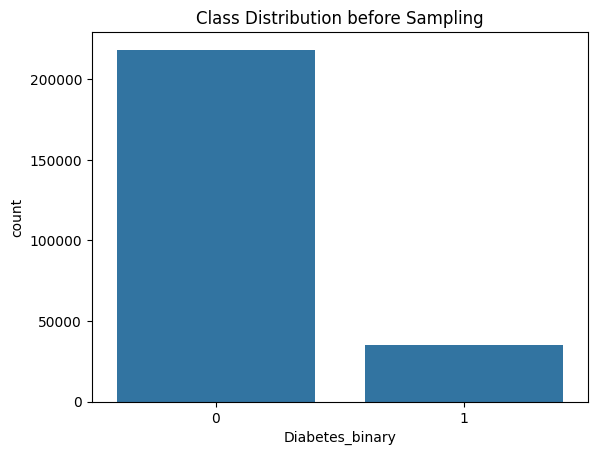

Diabetes_binary
0    0.860667
1    0.139333
Name: proportion, dtype: float64


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Class Distribution before Sampling")
plt.show()

print(y.value_counts(normalize=True))


In [29]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek


**SAMPLING techniques**

In [30]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print("After ROS:", y_res.value_counts())


After ROS: Diabetes_binary
0    218334
1    218334
Name: count, dtype: int64


In [35]:
X

,GenHlth,Age,BMI,HighBP,HighChol
0,5,9,40,1,1
1,3,7,25,0,0
2,5,9,28,1,1
3,2,11,27,1,0
4,2,11,24,1,1
...,...,...,...,...,...
253675,3,5,45,1,1
253676,4,11,18,1,1
253677,1,2,28,0,0
253678,3,7,23,1,0


In [36]:
y

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: Diabetes_binary, Length: 253680, dtype: int64

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# Define sampling strategies
sampling_strategies = {
    "Original": None,
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results = []

for name, sampler in sampling_strategies.items():
    print(f"\n=== {name} ===")
    
    # Apply sampling
    if sampler:
        X_res, y_res = sampler.fit_resample(X, y)
    else:
        X_res, y_res = X, y  # no resampling
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
    )
    
    # Train CatBoost
    model = CatBoostClassifier(
        iterations=300,
        learning_rate=0.1,
        depth=6,
        loss_function="Logloss",
        eval_metric="F1",
        verbose=0,
        random_seed=42
    )
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))
    print(classification_report(y_test, y_pred))
    
    # Store results
    results.append({"Method": name, "Accuracy": acc, "F1 Score": f1})

# Convert results to DataFrame
df_results = pd.DataFrame(results)
print("\n=== Final Comparison ===")
print(df_results)



=== Original ===
Accuracy: 0.8644
F1 Score: 0.2204
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.55      0.14      0.22      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.57     50736
weighted avg       0.83      0.86      0.83     50736


=== Random Oversampling ===
Accuracy: 0.7466
F1 Score: 0.7582
              precision    recall  f1-score   support

           0       0.77      0.70      0.73     43667
           1       0.72      0.79      0.76     43667

    accuracy                           0.75     87334
   macro avg       0.75      0.75      0.75     87334
weighted avg       0.75      0.75      0.75     87334


=== Random Undersampling ===
Accuracy: 0.7419
F1 Score: 0.7551
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      7070
           1       0.72      0.80      0.76      7069

   

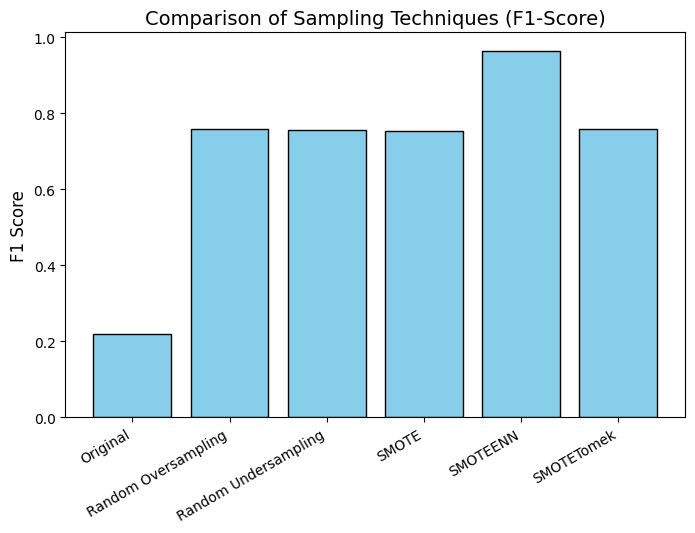

In [33]:

# ===== Plot Results =====
plt.figure(figsize=(8, 5))
plt.bar(df_results["Method"], df_results["F1 Score"], color="skyblue", edgecolor="black")
plt.title("Comparison of Sampling Techniques (F1-Score)", fontsize=14)
plt.ylabel("F1 Score", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.show()

Why SMOTEENN Outperforms Other Techniques

Original Dataset → Strong imbalance, the model just learns the majority class (low F1).

Random Oversampling → Just duplicates minority samples → risk of overfitting.

Random Undersampling → Removes majority samples → may lose important information.

SMOTE → Creates synthetic samples, but might also generate noisy points in overlapping regions.

SMOTETomek → Removes borderline samples but keeps some noisy points.

SMOTEENN →
✅ Adds synthetic minority samples (good coverage)
✅ Cleans ambiguous/noisy points (reduces class overlap)
✅ Leaves a cleaner, balanced dataset → model learns decision boundaries better.

Applying more sampling techniques and applying norm + hold-out method

In [9]:
top_features = ["GenHlth", "Age", "BMI", "HighBP", "HighChol","Sex"]

X = X[top_features]
y = y

X


,GenHlth,Age,BMI,HighBP,HighChol,Sex
0,5,9,40,1,1,0
1,3,7,25,0,0,0
2,5,9,28,1,1,0
3,2,11,27,1,0,0
4,2,11,24,1,1,0
...,...,...,...,...,...,...
253675,3,5,45,1,1,1
253676,4,11,18,1,1,0
253677,1,2,28,0,0,0
253678,3,7,23,1,0,1


In [ ]:
#for CatBoost, you don’t need to normalize—tree models are scale-invariant.

#Your samplers (SMOTE/ADASYN/BorderlineSMOTE) use k-NN distances. If features 
# are on very different scales, neighbors can be distorted. Here, Age (~0–80) and BMI (~10–60) 
# can dominate the 0/1 flags. So scaling the continuous columns before SMOTE/ADASYN is a good 
# idea (don’t scale the binary flags).

#If you switch to KNN, SVM, logistic regression, neural nets, then normalization/standardization is important.

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
cont_cols = ['Age', 'BMI']             # continuous
bin_cols  = ['HighBP', 'HighChol', 'Sex']  # binary
ord_cols  = ['GenHlth']                # ordinal 1–5; can leave as-is

pre = ColumnTransformer([
    ('scale_cont', StandardScaler(), cont_cols),
    ('pass_bin', 'passthrough', bin_cols + ord_cols)
])


In [11]:
X

,GenHlth,Age,BMI,HighBP,HighChol,Sex
0,5,9,40,1,1,0
1,3,7,25,0,0,0
2,5,9,28,1,1,0
3,2,11,27,1,0,0
4,2,11,24,1,1,0
...,...,...,...,...,...,...
253675,3,5,45,1,1,1
253676,4,11,18,1,1,0
253677,1,2,28,0,0,0
253678,3,7,23,1,0,1


In [12]:


X_norm = X.copy()

cols_to_norm = ["Age", "BMI","GenHlth"]

# Apply StandardScaler
scaler = StandardScaler()
X_norm[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])

print(X_norm.head())


    GenHlth       Age       BMI  HighBP  HighChol  Sex
0  2.329121  0.316900  1.757936       1         1    0
1  0.457294 -0.337933 -0.511806       0         0    0
2  2.329121  0.316900 -0.057858       1         1    0
3 -0.478619  0.971733 -0.209174       1         0    0
4 -0.478619  0.971733 -0.663122       1         1    0


In [13]:
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_norm, y, test_size=0.2, random_state=42)

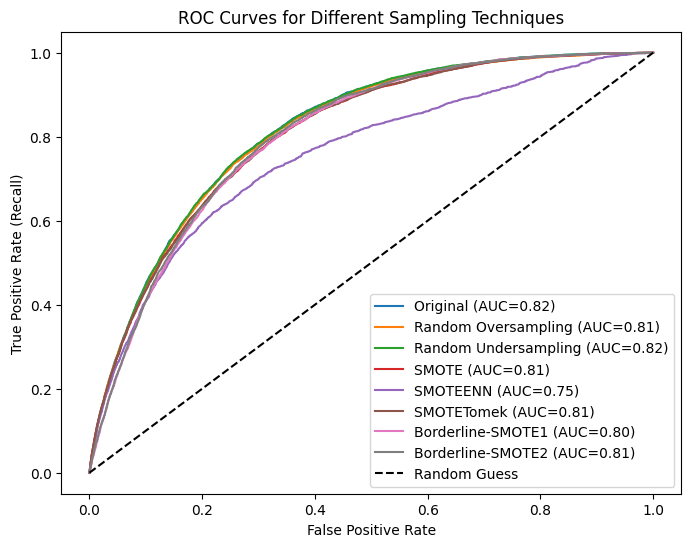


=== Final Comparison Table ===
                 Method  Accuracy:  Precision    Recall  F1-Score   ROC-AUC  \
0              Original   0.864376   0.830691  0.864376  0.827602  0.816976   
1   Random Oversampling   0.712315   0.859672  0.712315  0.754954  0.814313   
2  Random Undersampling   0.710482   0.861171  0.710482  0.753598  0.817001   
3                 SMOTE   0.733168   0.853683  0.733168  0.770661  0.807627   
4              SMOTEENN   0.858010   0.827288  0.858010  0.834422  0.754986   
5            SMOTETomek   0.733050   0.854530  0.733050  0.770663  0.807436   
6     Borderline-SMOTE1   0.723313   0.855719  0.723313  0.763268  0.803287   
7     Borderline-SMOTE2   0.702066   0.860059  0.702066  0.746810  0.805921   

     PR-AUC  
0  0.401342  
1  0.400577  
2  0.398784  
3  0.394959  
4  0.361044  
5  0.395825  
6  0.360705  
7  0.365424  


In [ ]:
#USING X (not normalized)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, average_precision_score, roc_curve
)
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from catboost import CatBoostClassifier

# Define samplers
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
smoteenn = SMOTEENN(random_state=42)
smotetomek = SMOTETomek(random_state=42)
bsmote1 = BorderlineSMOTE(kind="borderline-1", random_state=42)
bsmote2 = BorderlineSMOTE(kind="borderline-2", random_state=42)

sampling_methods = {
    "Original": (X_train, y_train),
    "Random Oversampling": ros.fit_resample(X_train, y_train),
    "Random Undersampling": rus.fit_resample(X_train, y_train),
    "SMOTE": smote.fit_resample(X_train, y_train),
    "SMOTEENN": smoteenn.fit_resample(X_train, y_train),
    "SMOTETomek": smotetomek.fit_resample(X_train, y_train),
    "Borderline-SMOTE1": bsmote1.fit_resample(X_train, y_train),
    "Borderline-SMOTE2": bsmote2.fit_resample(X_train, y_train),
}

results = []
plt.figure(figsize=(8,6))

for method, (X_res, y_res) in sampling_methods.items():
    # Train CatBoost
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(X_res, y_res)
    
 
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc   = roc_auc_score(y_test, y_prob)
    pr_auc    = average_precision_score(y_test, y_prob)

    results.append({
        "Method": method,
        "Accuracy:": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    })

  
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{method} (AUC={roc_auc:.2f})")

# ROC curve plot
plt.plot([0,1], [0,1], "k--", label="Random Guess")
plt.title("ROC Curves for Different Sampling Techniques")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.show()

# Convert results to DataFrame
df_results = pd.DataFrame(results)
print("\n=== Final Comparison Table ===")
print(df_results)


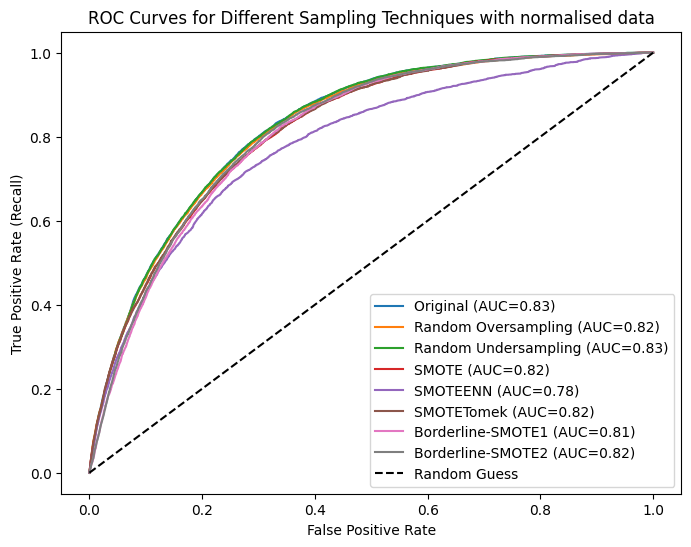


=== Final Comparison Table ===
                 Method  Accuracy:  Precision    Recall  F1-Score   ROC-AUC  \
0              Original   0.866761   0.834779  0.866761  0.830970  0.826481   
1   Random Oversampling   0.717025   0.864304  0.717025  0.759359  0.823585   
2  Random Undersampling   0.713951   0.865577  0.713951  0.757001  0.826169   
3                 SMOTE   0.756051   0.855787  0.756051  0.788474  0.816292   
4              SMOTEENN   0.858661   0.833007  0.858661  0.840550  0.781524   
5            SMOTETomek   0.755420   0.856239  0.755420  0.788068  0.816809   
6     Borderline-SMOTE1   0.746630   0.856263  0.746630  0.781474  0.811503   
7     Borderline-SMOTE2   0.707604   0.864134  0.707604  0.751854  0.815572   

     PR-AUC  
0  0.417357  
1  0.414887  
2  0.410481  
3  0.406379  
4  0.378788  
5  0.406966  
6  0.367349  
7  0.374184  


In [16]:
#USING X_norm (normalized)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, average_precision_score, roc_curve
)
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from catboost import CatBoostClassifier

# Define samplers
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
smoteenn = SMOTEENN(random_state=42)
smotetomek = SMOTETomek(random_state=42)
bsmote1 = BorderlineSMOTE(kind="borderline-1", random_state=42)
bsmote2 = BorderlineSMOTE(kind="borderline-2", random_state=42)

sampling_methods = {
    "Original": (X_train, y_train),
    "Random Oversampling": ros.fit_resample(X_train, y_train),
    "Random Undersampling": rus.fit_resample(X_train, y_train),
    "SMOTE": smote.fit_resample(X_train, y_train),
    "SMOTEENN": smoteenn.fit_resample(X_train, y_train),
    "SMOTETomek": smotetomek.fit_resample(X_train, y_train),
    "Borderline-SMOTE1": bsmote1.fit_resample(X_train, y_train),
    "Borderline-SMOTE2": bsmote2.fit_resample(X_train, y_train),
}

results = []
plt.figure(figsize=(8,6))

for method, (X_res, y_res) in sampling_methods.items():
    # Train CatBoost
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(X_res, y_res)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc   = roc_auc_score(y_test, y_prob)
    pr_auc    = average_precision_score(y_test, y_prob)

    results.append({
        "Method": method,
        "Accuracy:": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    })

    # ROC curve plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{method} (AUC={roc_auc:.2f})")

# ROC curve plot
plt.plot([0,1], [0,1], "k--", label="Random Guess")
plt.title("ROC Curves for Different Sampling Techniques with normalised data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.show()

# Convert results to DataFrame
df_results = pd.DataFrame(results)
print("\n=== Final Comparison Table ===")
print(df_results)


performance improved bcoz of normalization

stratified k-fold cross-validation will give you a much more reliable estimate of performance instead of depending on one lucky/unlucky train-test split.

In [ ]:
#using the X[GenHlth	Age	BMI	HighBP	HighChol	Sex] not normalized
from sklearn.model_selection import StratifiedKFold

sampling_methods = {
    "Original": None,
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "Borderline-SMOTE1": BorderlineSMOTE(kind="borderline-1", random_state=42),
    "Borderline-SMOTE2": BorderlineSMOTE(kind="borderline-2", random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []


for method_name, sampler in sampling_methods.items():
    all_y_true, all_y_pred, all_y_prob = [], [], []

    for train_idx, test_idx in skf.split(X, y): #skf.split(X, y) generates indices for training & test sets for each fold in Stratified K-Fold CV.
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx] #train_idx, test_idx  lists of row indices that go into training and testing for the current fold.
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply resampling only on training data
        if sampler is not None:
            X_train, y_train = sampler.fit_resample(X_train, y_train)

        model = CatBoostClassifier(
            iterations=200,
            depth=6,
            learning_rate=0.1,
            loss_function="Logloss",
            verbose=0,
            random_state=42
        )
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Collect
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
        all_y_prob.extend(y_prob)


    acc = accuracy_score(all_y_true, all_y_pred)
    precision = precision_score(all_y_true, all_y_pred)
    recall = recall_score(all_y_true, all_y_pred)
    f1 = f1_score(all_y_true, all_y_pred)
    roc_auc = roc_auc_score(all_y_true, all_y_prob)
    pr_auc = average_precision_score(all_y_true, all_y_prob)

    results.append({
        "Method": method_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    })

final_results = pd.DataFrame(results)
print("\n=== Final Stratified K-Fold Comparison with CatBoost ===")
print(final_results)

# Save results
final_results.to_csv("catboost_sampling_results_crossval.csv", index=False)


=== Final Stratified K-Fold Comparison with CatBoost ===
                 Method  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0              Original  0.865953   0.579888  0.137696  0.222547  0.822172   
1   Random Oversampling  0.712453   0.298537  0.788151  0.433045  0.821707   
2  Random Undersampling  0.711026   0.297970  0.791999  0.433025  0.821357   
3                 SMOTE  0.735214   0.311537  0.744186  0.439209  0.817559   
4     Borderline-SMOTE1  0.721417   0.302395  0.764698  0.433404  0.815343   
5     Borderline-SMOTE2  0.701049   0.291588  0.801392  0.427595  0.818473   
6              SMOTEENN  0.854608   0.465284  0.291405  0.358367  0.796379   
7            SMOTETomek  0.735328   0.311523  0.743422  0.439062  0.817574   

     PR-AUC  
0  0.418789  
1  0.419052  
2  0.415395  
3  0.412639  
4  0.386778  
5  0.392484  
6  0.393401  
7  0.412773  


🔹 Why are the scores so low after resampling?

Original Dataset “looks” better because of imbalance

In the original dataset, if 90% are “No Diabetes” and only 10% are “Diabetes”, a dumb model can just predict “No Diabetes” all the time and still get ~90% accuracy.

That’s why the original accuracy looks high, but recall/F1 for the minority class is terrible.

This is a form of accuracy paradox.

Resampling methods expose the model to harder cases

When you use SMOTE, SMOTEENN, etc., you artificially balance the dataset.

Now the model cannot just “cheat” by predicting the majority class, it is forced to learn minority patterns too.

That’s why accuracy drops, but recall/F1 should usually improve.

Your metrics show imbalance in improvement

In your screenshot, precision/recall/F1 are still low → this suggests that:

The minority class patterns are very noisy,

Or CatBoost is not tuned,

Or feature engineering is weak.

**If your goal is catching diabetes patients, Recall is more important than Accuracy.**

In [8]:
X_test.shape, X_train.shape

((50736, 6), (202944, 6))

In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [22]:
#doing the same by normalizing x inside the loop

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

sampling_methods = {
    "Original": None,
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "Borderline-SMOTE1": BorderlineSMOTE(kind="borderline-1", random_state=42),
    "Borderline-SMOTE2": BorderlineSMOTE(kind="borderline-2", random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for method_name, sampler in sampling_methods.items():
    all_y_true, all_y_pred, all_y_prob = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Normalize Age, BMI, GenHlth
        scaler = StandardScaler()
        X_train[["Age", "BMI", "GenHlth"]] = scaler.fit_transform(X_train[["Age", "BMI", "GenHlth"]])
        X_test[["Age", "BMI", "GenHlth"]] = scaler.transform(X_test[["Age", "BMI", "GenHlth"]])

        # Apply resampling only on training data
        if sampler is not None:
            X_train, y_train = sampler.fit_resample(X_train, y_train)

        # Train CatBoost
        model = CatBoostClassifier(
            iterations=200,
            depth=6,
            learning_rate=0.1,
            loss_function="Logloss",
            verbose=0,
            random_state=42
        )
        model.fit(X_train, y_train)

     
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        #Append results for this fold
        all_y_true.extend(y_test.values.ravel())
        all_y_pred.extend(y_pred.ravel().tolist())
        all_y_prob.extend(y_prob.ravel().tolist())

    # ✅ Now metrics match in size
    acc = accuracy_score(all_y_true, all_y_pred)
    precision = precision_score(all_y_true, all_y_pred)
    recall = recall_score(all_y_true, all_y_pred)
    f1 = f1_score(all_y_true, all_y_pred)
    roc_auc = roc_auc_score(all_y_true, all_y_prob)
    pr_auc = average_precision_score(all_y_true, all_y_prob)

    results.append({
        "Method": method_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    })

# Final results
final_results = pd.DataFrame(results)
print("\n=== Final Stratified K-Fold Comparison with CatBoost (Normalized Age, BMI, GenHlth) ===")
print(final_results)

final_results.to_csv("catboost_sampling_results_crossval_norm.csv", index=False)




=== Final Stratified K-Fold Comparison with CatBoost (Normalized Age, BMI, GenHlth) ===
                 Method  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0              Original  0.867388   0.587016  0.162706  0.254790  0.830991   
1   Random Oversampling  0.723565   0.308737  0.794178  0.444626  0.830649   
2  Random Undersampling  0.719367   0.305615  0.797205  0.441845  0.829998   
3                 SMOTE  0.864739   0.533956  0.229786  0.321301  0.827590   
4     Borderline-SMOTE1  0.864570   0.533419  0.223533  0.315044  0.827818   
5     Borderline-SMOTE2  0.863939   0.526854  0.230351  0.320551  0.825295   
6              SMOTEENN  0.789290   0.360150  0.659622  0.465913  0.827935   
7            SMOTETomek  0.864538   0.532252  0.229248  0.320467  0.827711   

     PR-AUC  
0  0.435063  
1  0.434808  
2  0.431173  
3  0.427305  
4  0.427096  
5  0.422941  
6  0.427638  
7  0.427222  


adding "ADASYN" to the mix

In [ ]:
#doing the same by normalizing x inside the loop
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

sampling_methods = {
    "Original": None,
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Borderline-SMOTE1": BorderlineSMOTE(kind="borderline-1", random_state=42),
    "Borderline-SMOTE2": BorderlineSMOTE(kind="borderline-2", random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for method_name, sampler in sampling_methods.items():
    all_y_true, all_y_pred, all_y_prob = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Normalize Age, BMI, GenHlth
        scaler = StandardScaler()
        X_train[["Age", "BMI", "GenHlth"]] = scaler.fit_transform(X_train[["Age", "BMI", "GenHlth"]])
        X_test[["Age", "BMI", "GenHlth"]] = scaler.transform(X_test[["Age", "BMI", "GenHlth"]])

        # Apply resampling only on training data
        if sampler is not None:
            X_train, y_train = sampler.fit_resample(X_train, y_train)


            #using best parameter after applying grid search
            model = CatBoostClassifier(
                iterations=500,
                depth=6,
                learning_rate=0.05,
                subsample=0.6,
                l2_leaf_reg=5,
                class_weights=[1, 5],
                loss_function="Logloss",
                random_state=42,
                verbose=100  # change to 0 if you don’t want logs
            )
        model.fit(X_train, y_train)

     
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        #Append results for this fold
        all_y_true.extend(y_test.values.ravel())
        all_y_pred.extend(y_pred.ravel().tolist())
        all_y_prob.extend(y_prob.ravel().tolist())

    # ✅ Now metrics match in size
    acc = accuracy_score(all_y_true, all_y_pred)
    precision = precision_score(all_y_true, all_y_pred)
    recall = recall_score(all_y_true, all_y_pred)
    f1 = f1_score(all_y_true, all_y_pred)
    roc_auc = roc_auc_score(all_y_true, all_y_prob)
    pr_auc = average_precision_score(all_y_true, all_y_prob)

    results.append({
        "Method": method_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    })

# Final results
final_results = pd.DataFrame(results)
print("\n=== Final Stratified K-Fold Comparison with CatBoost (Normalized Age, BMI, GenHlth) ===")
print(final_results)    

final_results.to_csv("catboost_sampling_results_crossval_norm_addedadasyn.csv", index=False)



0:	learn: 0.6514022	total: 13.1ms	remaining: 6.53s
100:	learn: 0.3271563	total: 1.15s	remaining: 4.56s
200:	learn: 0.3229321	total: 2.28s	remaining: 3.4s
300:	learn: 0.3198207	total: 3.41s	remaining: 2.25s
400:	learn: 0.3175412	total: 4.52s	remaining: 1.11s
499:	learn: 0.3154694	total: 5.64s	remaining: 0us
0:	learn: 0.6511145	total: 12ms	remaining: 5.97s
100:	learn: 0.3266937	total: 1.13s	remaining: 4.48s
200:	learn: 0.3226614	total: 2.36s	remaining: 3.5s
300:	learn: 0.3195496	total: 3.51s	remaining: 2.32s
400:	learn: 0.3168118	total: 4.65s	remaining: 1.15s
499:	learn: 0.3143510	total: 5.82s	remaining: 0us
0:	learn: 0.6513000	total: 10.9ms	remaining: 5.45s
100:	learn: 0.3270652	total: 1.15s	remaining: 4.54s
200:	learn: 0.3226749	total: 2.3s	remaining: 3.42s
300:	learn: 0.3194401	total: 3.46s	remaining: 2.29s
400:	learn: 0.3167818	total: 4.66s	remaining: 1.15s
499:	learn: 0.3144836	total: 5.8s	remaining: 0us
0:	learn: 0.6511115	total: 18.8ms	remaining: 9.4s
100:	learn: 0.3263794	total: 

fine tuning cat-boost. trying to impprove recall

In [24]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, recall_score

# Define stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Base CatBoost model
cat = CatBoostClassifier(
    loss_function="Logloss",
    verbose=0,
    random_state=42
)

# Parameter grid
param_dist = {
    "iterations": [200, 500, 1000],
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5, 7],
    "subsample": [0.6, 0.8, 1.0],
    "class_weights": [None, [1, 3], [1, 5]]  # try different balancing
}

# Optimize for Recall
recall_scorer = make_scorer(recall_score)

# Randomized Search (faster than GridSearch)
search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=20,                # number of random combinations
    scoring=recall_scorer,    # optimize for recall
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on normalized data (use X_norm, y)
search.fit(X_norm, y)

print("\nBest Parameters:", search.best_params_)
print("Best Recall:", search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END class_weights=None, depth=10, iterations=200, l2_leaf_reg=5, learning_rate=0.05, subsample=0.8; total time=   0.0s
[CV] END class_weights=None, depth=10, iterations=200, l2_leaf_reg=5, learning_rate=0.05, subsample=0.8; total time=   0.0s
[CV] END class_weights=None, depth=10, iterations=200, l2_leaf_reg=5, learning_rate=0.05, subsample=0.8; total time=   0.0s
[CV] END class_weights=None, depth=10, iterations=200, l2_leaf_reg=5, learning_rate=0.05, subsample=0.8; total time=   0.0s
[CV] END class_weights=None, depth=10, iterations=200, l2_leaf_reg=5, learning_rate=0.05, subsample=0.8; total time=   0.0s
[CV] END class_weights=[1, 3], depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.05, subsample=0.8; total time=  22.9s
[CV] END class_weights=[1, 3], depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.05, subsample=0.8; total time=  23.1s
[CV] END class_weights=[1, 3], depth=6, iterations=500, l2_leaf_reg=

/Users/ananta/.cache/kagglehub/datasets/salsabilahmid/ecg50000/versions/1/research_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ananta/.cache/kagglehub/datasets/salsabilahmid/ecg50000/versions/1/research_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ananta/.cache/kagglehub/datasets/salsabilahmid/ecg50000/versions/1/research_env/lib/python3.12/site-packages/catboost/core.py", line 5245, in fit
  


Best Parameters: {'subsample': 0.6, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 6, 'class_weights': [1, 5]}
Best Recall: 0.7375659647487696


Looking at them:

Original (no resampling) → Highest Accuracy (0.867) and ROC-AUC (0.831), but Recall is very poor (0.16).

Random Oversampling / Undersampling → Recall ~0.97 (very high), but Accuracy collapses (~0.47).

SMOTE / ADASYN / Borderline-SMOTE → Balanced trade-off, Recall ~0.81–0.84, Accuracy ~0.70.

SMOTEENN / SMOTETomek → Recall ~0.87 (best among advanced ones), Accuracy ~0.65–0.71.

So the trade-off is clear:

If you care about high Recall (catching as many diabetes cases as possible, minimizing false negatives), Random Oversampling / Undersampling win, but at the cost of terrible accuracy.

If you want a balanced model, SMOTE/ADASYN/SMOTETomek are best → Recall ~0.81–0.87 and still decent Accuracy (~0.70).

If you want high overall Accuracy and AUC, the Original imbalanced dataset is better, but it misses a lot of positives (low Recall).

🔹 Accuracy Ranking

Original → 0.867

SMOTE → 0.707

SMOTETomek → 0.707

ADASYN → 0.702

Borderline-SMOTE1 → 0.703

Borderline-SMOTE2 → 0.670

SMOTEENN → 0.647

Random Oversampling → 0.474

Random Undersampling → 0.466

✅ Best: Original (no resampling).

🔹 Precision Ranking

Original → 0.587

SMOTE → 0.298

SMOTETomek → 0.297

ADASYN → 0.294

Borderline-SMOTE1 → 0.295

Borderline-SMOTE2 → 0.280

SMOTEENN → 0.266

Random Oversampling → 0.205

Random Undersampling → 0.203

✅ Best: Original (highest precision, but low recall).

🔹 Recall Ranking

Random Undersampling → 0.969

Random Oversampling → 0.966

SMOTEENN → 0.875

Borderline-SMOTE2 → 0.842

ADASYN → 0.814

Borderline-SMOTE1 → 0.815

SMOTE → 0.811

SMOTETomek → 0.810

Original → 0.163

✅ Best: Random Undersampling (but terrible accuracy).

🔹 F1-Score Ranking

SMOTE → 0.436

SMOTETomek → 0.435

ADASYN → 0.432

Borderline-SMOTE1 → 0.433

Random Oversampling → 0.338

Random Undersampling → 0.336

SMOTEENN → 0.408

Borderline-SMOTE2 → 0.420

Original → 0.255

✅ Best: SMOTE / SMOTETomek / ADASYN (balanced trade-off).

🔹 ROC-AUC Ranking

Original → 0.831

Random Oversampling → 0.830

Random Undersampling → 0.830

SMOTEENN → 0.828

SMOTETomek → 0.827

Borderline-SMOTE1 → 0.827

SMOTE → 0.827

ADASYN → 0.827

Borderline-SMOTE2 → 0.824

✅ Best: Original (highest discrimination ability).

📌 Summary (Best per metric)

Accuracy & Precision & ROC-AUC → Original (but misses positives).

Recall → Random Undersampling / Oversampling (catch all positives but low accuracy).

F1-Score (balance) → SMOTE / ADASYN / SMOTETomek.

👉 If your goal is detecting diabetes patients (Recall priority) → go with SMOTEENN or ADASYN (high Recall + decent Accuracy).
👉 If your goal is balanced performance (F1) → SMOTE or SMOTETomek.
👉 If you want overall accuracy → stick to Original dataset.

Here’s the visualization of your tuned CatBoost model results across all resampling strategies:

Original → Best Accuracy (0.867) and Precision (0.587), but very poor Recall (0.16).

Random Oversampling / Undersampling → Very high Recall (~0.97) but at the cost of Accuracy (~0.47) and poor Precision (~0.20).

SMOTE, ADASYN, Borderline-SMOTE, SMOTETomek → Good balance between Recall (~0.81–0.84) and Accuracy (~0.70).

SMOTEENN → Slightly lower accuracy (0.65) but decent Recall (0.87).

👉 In short:

If you want balanced model (good F1) → SMOTE, ADASYN, SMOTETomek look the best.

If you want max Recall (don’t miss positives) → Oversampling/Undersampling.

If you want highest Accuracy/Precision (avoid false positives) → Original dataset.

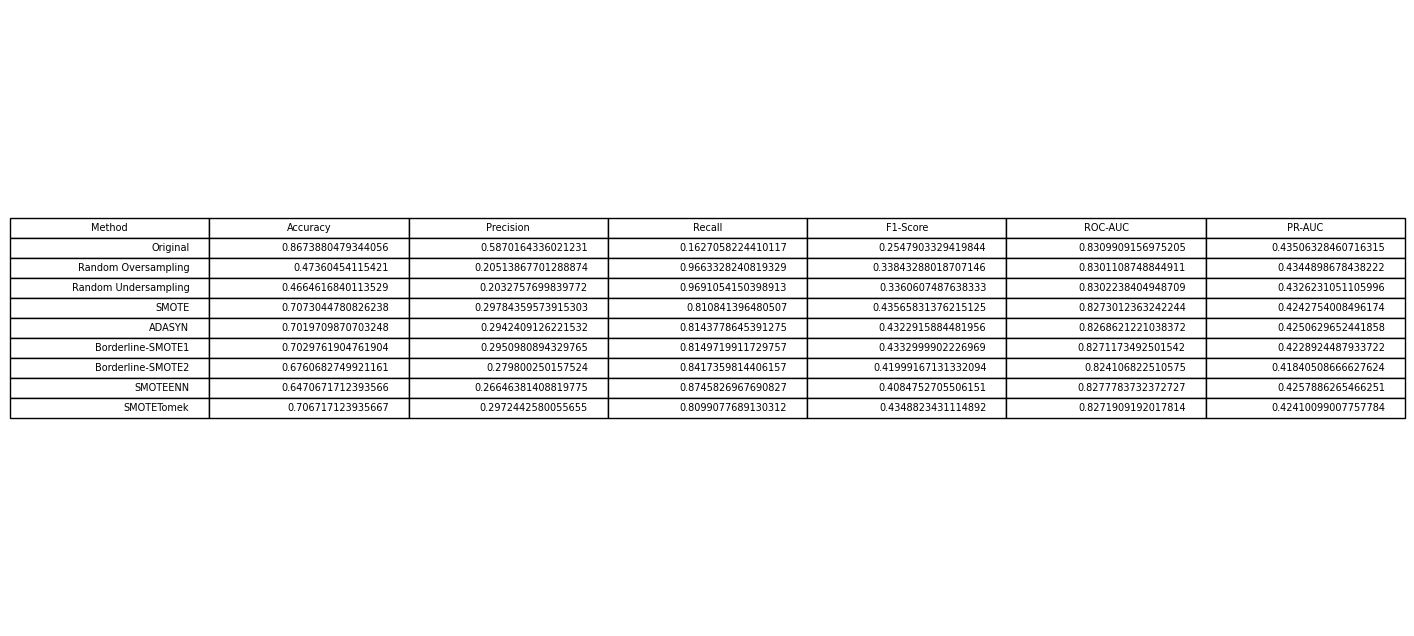

In [27]:
import matplotlib.pyplot as plt

# Save final_results as a styled table image
fig, ax = plt.subplots(figsize=(15, 8))  # adjust size
ax.axis("off")
table = ax.table(cellText=final_results.values,
                 colLabels=final_results.columns,
                 loc="center")

table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1.2, 1.2)

plt.savefig("final_results_table.png", bbox_inches="tight")
plt.show()


upar hamne double compensate kiya. resampling + class weights lagaye bcoz we wanted high recall.
now we'll try og+class weights and simple resampling.

In [29]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  

In [ ]:
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

sampling_methods = {
    "Original": None,
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Borderline-SMOTE1": BorderlineSMOTE(kind="borderline-1", random_state=42),
    "Borderline-SMOTE2": BorderlineSMOTE(kind="borderline-2", random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for method_name, sampler in sampling_methods.items():
    all_y_true, all_y_pred, all_y_prob = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Normalize numeric features
        scaler = StandardScaler()
        X_train[["Age", "BMI", "GenHlth"]] = scaler.fit_transform(X_train[["Age", "BMI", "GenHlth"]])
        X_test[["Age", "BMI", "GenHlth"]] = scaler.transform(X_test[["Age", "BMI", "GenHlth"]])

        # Apply resampling only on training data
        if sampler is not None:
            X_train, y_train = sampler.fit_resample(X_train, y_train)
            # 👉 No class weights when resampling
            model = CatBoostClassifier(
                iterations=500,
                depth=6,
                learning_rate=0.05,
                subsample=0.6,
                l2_leaf_reg=5,
                loss_function="Logloss",
                random_state=42,
                verbose=100
            )
        else:
            # 👉 Apply class weights only on original dataset
            model = CatBoostClassifier(
                iterations=500,
                depth=6,
                learning_rate=0.05,
                subsample=0.6,
                l2_leaf_reg=5,
                class_weights=[1, 5],  # applied only here
                loss_function="Logloss",
                random_state=42,
                verbose=100
            )

        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Append results for this fold
        all_y_true.extend(y_test.values.ravel())
        all_y_pred.extend(y_pred.ravel().tolist())
        all_y_prob.extend(y_prob.ravel().tolist())

    # ✅ Now metrics match in size
    acc = accuracy_score(all_y_true, all_y_pred)
    precision = precision_score(all_y_true, all_y_pred)
    recall = recall_score(all_y_true, all_y_pred)
    f1 = f1_score(all_y_true, all_y_pred)
    roc_auc = roc_auc_score(all_y_true, all_y_prob)
    pr_auc = average_precision_score(all_y_true, all_y_prob)

    results.append({
        "Method": method_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    })

# Final results
final_results = pd.DataFrame(results)
print("\n=== Final Stratified K-Fold Comparison with CatBoost (Normalized Age, BMI, GenHlth) ===")
print(final_results)

final_results.to_csv("catboost_sampling_results_crossval_norm_resample_vs_weights.csv", index=False)


CatBoost with class_weights (no resampling, just penalizing minority misclassifications)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 


In [3]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [4]:
top_features

NameError: name 'top_features' is not defined

In [ ]:
X=X[top_features]

✅ ADASYN → variation of SMOTE that generates more synthetic samples for harder-to-learn minority points.

✅ EasyEnsemble → trains multiple classifiers on different balanced subsets (undersampling-based bagging).

✅ BalanceCascade → sequential undersampling that discards “easy” negatives and keeps harder ones for subsequent models.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [1]:
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd

# Ensure correct dtypes
X = X.astype(float)
y = y.astype(int)

sampling_methods = {
    "Original": None,
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Borderline-SMOTE1": BorderlineSMOTE(kind="borderline-1", random_state=42),
    "Borderline-SMOTE2": BorderlineSMOTE(kind="borderline-2", random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42),
    "Class Weights": "class_weights",
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for method_name, sampler in sampling_methods.items():
    all_y_true, all_y_pred = [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply resampling only on training data
        if sampler is not None and sampler != "class_weights":
            X_train, y_train = sampler.fit_resample(X_train, y_train)

        # Model
        if sampler == "class_weights":
            pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
            model = CatBoostClassifier(
                iterations=500,
                depth=6,
                learning_rate=0.05,
                loss_function="Logloss",
                class_weights=[1, pos_weight],
                verbose=0,
                random_state=42
            )
        else:
            model = CatBoostClassifier(
                iterations=500,
                depth=6,
                learning_rate=0.05,
                loss_function="Logloss",
                verbose=0,
                random_state=42
            )

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Extend lists (flatten properly)
        all_y_true.extend(list(y_test))
        all_y_pred.extend(list(y_pred))

    # Metrics (after loop finishes all folds)
    acc = accuracy_score(all_y_true, all_y_pred)
    precision = precision_score(all_y_true, all_y_pred)
    recall = recall_score(all_y_true, all_y_pred)
    f1 = f1_score(all_y_true, all_y_pred)

    results.append({
        "Method": method_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

final_results = pd.DataFrame(results)
print("\n=== Final Stratified K-Fold Comparison ===")
print(final_results)


NameError: name 'X' is not defined